## Ejercicio hiperparametrización breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Prueba al menos 5 modelos diferentes de clasificación y aplica un GridSearchCV mediante Pipelines. Aplica también un RandomizedSearchCV.
3. Conclusiones. Guarda el modelo final en un archivo con pickle.

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [42]:
%matplotlib inline
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [43]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [44]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [45]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [82]:
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [47]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [48]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [49]:
from ydata_profiling import ProfileReport

In [50]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("your_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


[]

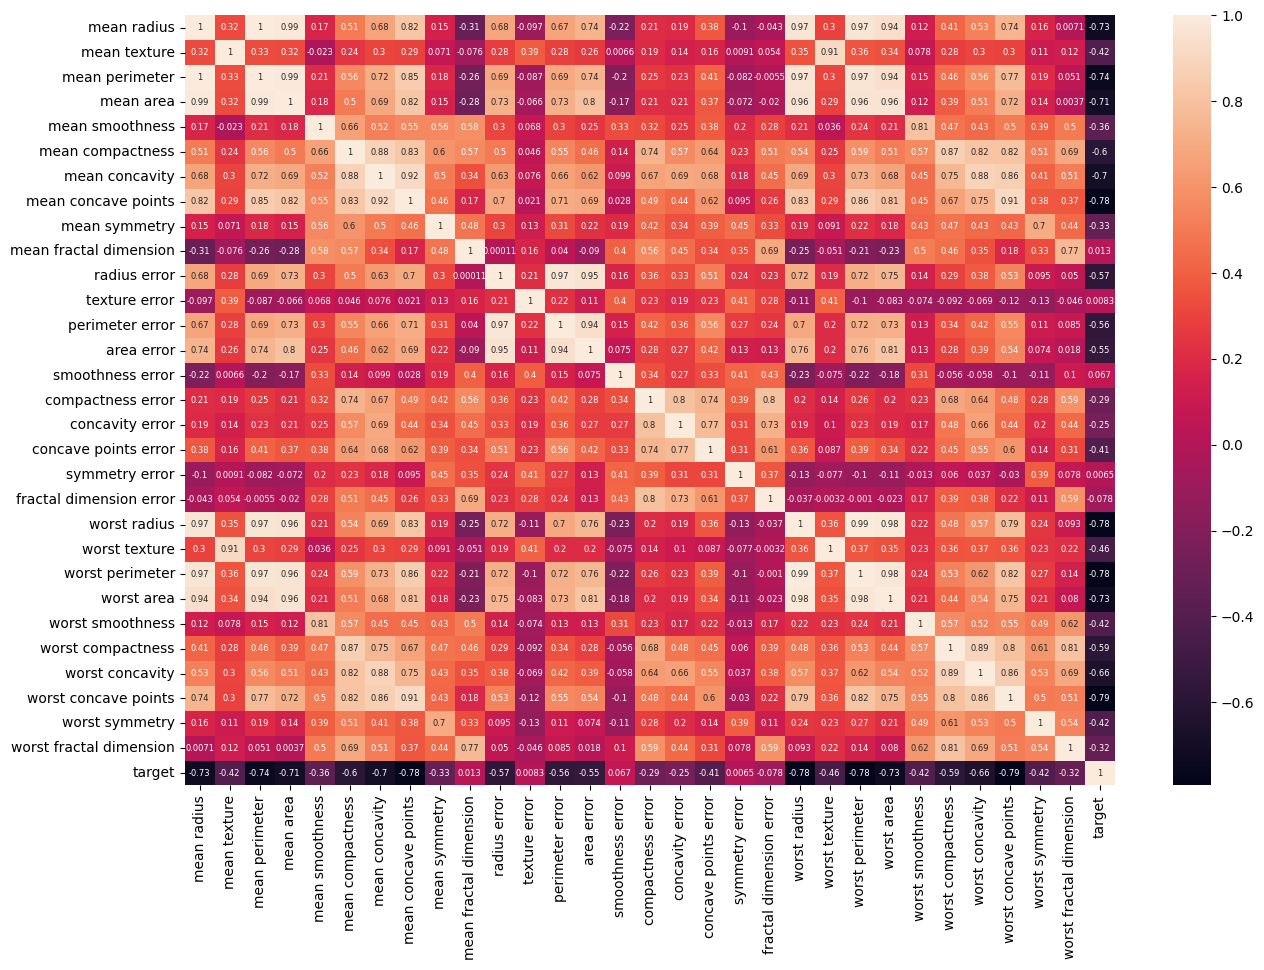

In [51]:

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 6})
plt.plot()

<Axes: xlabel='mean perimeter', ylabel='mean area'>

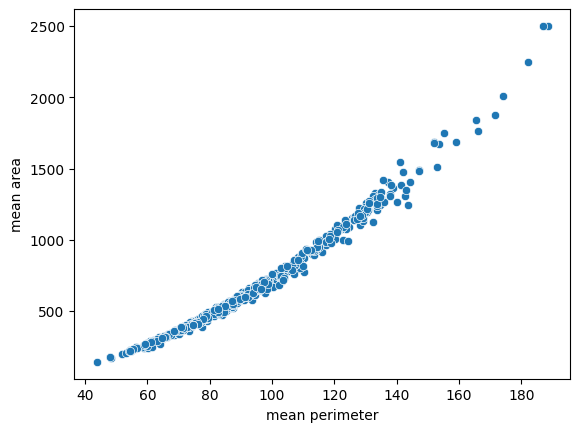

In [52]:
sns.scatterplot(x=df['mean perimeter'], y=df['mean area'])

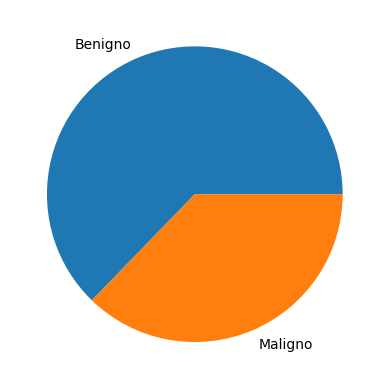

In [53]:
plt.pie(x=df['target'].value_counts(), labels=['Benigno', "Maligno"]);

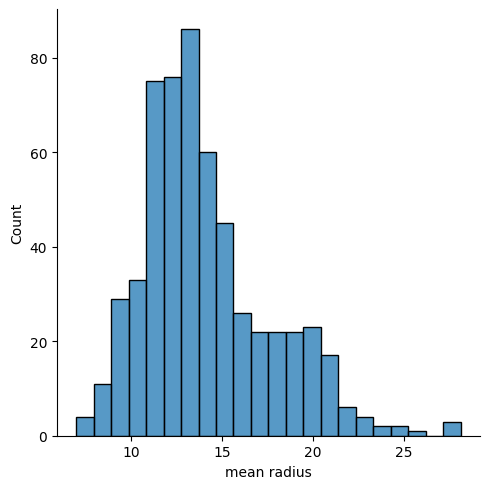

In [54]:
sns.displot(df['mean radius'])

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="target")
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [56]:

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score

In [57]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest()),
    ("classifier", RandomForestClassifier())
])

In [58]:
log_params = {
    "feature_selection__k": np.arange(5,15),
    "classifier": [LogisticRegression()],
    "classifier__C": [0.1,1,10]
}

In [59]:
rf_params = {
    "scaler": [StandardScaler(), MinMaxScaler(), None],
    "feature_selection__k": np.arange(10,15),
    "classifier__max_depth": [3,5,7]
}

In [60]:
gb_params = {
    "scaler": [StandardScaler(), MinMaxScaler(), None],
    "feature_selection__k": np.arange(10,15),
    "classifier": [GradientBoostingClassifier()],
    "classifier__max_depth": [3,5,7]
}

In [61]:
knn_params = {
    "feature_selection__k": np.arange(5,15),
    "classifier": [KNeighborsClassifier()],
    "classifier__n_neighbors": np.arange(5,15)
}

In [62]:
svm_params = {
    "feature_selection__k": np.arange(5,15),
    "classifier": [SVC()],
    "classifier__C": [0.1,1,10],
    "classifier__kernel": ["linear", "rbf"]
}

In [63]:
search_space = [
    log_params,
    rf_params,
    gb_params,
    knn_params,
    svm_params
]

In [94]:
clf_gs = GridSearchCV(pipe, search_space, cv=3, scoring=negative_class_recall_scorer, verbose=2, n_jobs=-1)

In [95]:
clf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 7720 candidates, totalling 23160 fits


C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-0...
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                          'classifier__kernel': ['linear', 'rbf'],
                          'feature_selection__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}],
             scoring=make_scorer(recall_score, response_method='predict', pos_label=0),
             verbose=2)

In [96]:
print(clf_gs.best_estimator_)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=np.int64(13))),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=np.float64(3.2745491628777286)))])
0.9644945697577277
{'classifier': GradientBoostingClassifier(), 'classifier__learning_rate': np.float64(3.2745491628777286), 'classifier__max_depth': 3, 'feature_selection__k': np.int64(13), 'scaler': StandardScaler()}


In [97]:
final_model = clf_gs.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [98]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.8157894736842105
precision_score 0.8048780487804879
recall_score 0.9295774647887324
roc_auc_score 0.7787422207664593
confusion_matrix
 [[27 16]
 [ 5 66]]


In [69]:
np.logspace(-3,3,100)

array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-02, 2.15443469e-02, 2.47707636e-02,
       2.84803587e-02, 3.27454916e-02, 3.76493581e-02, 4.32876128e-02,
       4.97702356e-02, 5.72236766e-02, 6.57933225e-02, 7.56463328e-02,
       8.69749003e-02, 1.00000000e-01, 1.14975700e-01, 1.32194115e-01,
       1.51991108e-01, 1.74752840e-01, 2.00923300e-01, 2.31012970e-01,
       2.65608778e-01, 3.05385551e-01, 3.51119173e-01, 4.03701726e-01,
       4.64158883e-01, 5.33669923e-01, 6.13590727e-01, 7.05480231e-01,
       8.11130831e-01, 9.32603347e-01, 1.07226722e+00, 1.23284674e+00,
       1.41747416e+00, 1.62975083e+00, 1.87381742e+00, 2.15443469e+00,
      

In [70]:
log_params = {
    "feature_selection__k": np.arange(5,15),
    "classifier": [LogisticRegression()],
    "classifier__C": np.logspace(-3,3,100)
}
rf_params = {
    "scaler": [StandardScaler(), MinMaxScaler(), None],
    "feature_selection__k": np.arange(10,15),
    "classifier__max_depth": np.arange(2,10)
}
gb_params = {
    "scaler": [StandardScaler(), MinMaxScaler(), None],
    "feature_selection__k": np.arange(10,15),
    "classifier": [GradientBoostingClassifier()],
    "classifier__max_depth": [3,5,7],
    "classifier__learning_rate":np.logspace(-3,3,100)
}
knn_params = {
    "feature_selection__k": np.arange(5,15),
    "classifier": [KNeighborsClassifier()],
    "classifier__n_neighbors": np.arange(5,15)
}
svm_params = {
    "feature_selection__k": np.arange(5,15),
    "classifier": [SVC()],
    "classifier__C": np.logspace(-3,3,100),
    "classifier__kernel": ["linear", "rbf"]
}
search_space = [
    log_params,
    rf_params,
    gb_params,
    knn_params,
    svm_params
]

In [71]:
clf_gs = RandomizedSearchCV(pipe, search_space, cv=3, scoring="accuracy", verbose=2, n_jobs=-1, n_iter=280)
clf_gs.fit(X_train, y_train)

print(clf_gs.best_estimator_)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

final_model_2 = clf_gs.best_estimator_
final_model_2.fit(X_train, y_train)
y_pred = final_model_2.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 280 candidates, totalling 840 fits
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=np.int64(6))),
                ('classifier', SVC(C=np.float64(8.697490026177835)))])
0.9626031137446264
{'feature_selection__k': np.int64(6), 'classifier__kernel': 'rbf', 'classifier__C': np.float64(8.697490026177835), 'classifier': SVC()}
accuracy_score 0.956140350877193
precision_score 0.9459459459459459
recall_score 0.9859154929577465
roc_auc_score 0.9464461185718965
confusion_matrix
 [[39  4]
 [ 1 70]]


C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [87]:
from sklearn.metrics import make_scorer, recall_score

# Crear un scorer personalizado para el recall de la clase negativa
negative_class_recall_scorer = make_scorer(recall_score, pos_label=0)
positive_class_recall_scorer = make_scorer(recall_score, pos_label=1)

In [92]:
clf_gs = RandomizedSearchCV(pipe, search_space, cv=3, scoring=positive_class_recall_scorer, verbose=2, n_jobs=-1,n_iter=280)
clf_gs.fit(X_train, y_train)

print(clf_gs.best_estimator_)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

final_model_2 = clf_gs.best_estimator_
final_model_2.fit(X_train, y_train)
y_pred = final_model_2.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 280 candidates, totalling 840 fits


C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('scaler', None),
                ('feature_selection', SelectKBest(k=np.int64(10))),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=np.float64(0.0013219411484660286),
                                            max_depth=5))])
1.0
{'scaler': None, 'feature_selection__k': np.int64(10), 'classifier__max_depth': 5, 'classifier__learning_rate': np.float64(0.0013219411484660286), 'classifier': GradientBoostingClassifier()}
accuracy_score 0.6228070175438597
precision_score 0.6228070175438597
recall_score 1.0
roc_auc_score 0.5
confusion_matrix
 [[ 0 43]
 [ 0 71]]


In [72]:
from sklearn.model_selection import cross_val_score

results_cv_1 = cross_val_score(final_model, X, y, scoring="accuracy", cv=10)
print(results_cv_1.mean())

results_cv_2 = cross_val_score(final_model_2, X, y, scoring="accuracy", cv=10)
print(results_cv_2.mean())

0.9560776942355889
0.9578320802005011


In [73]:
import pickle

In [74]:
import os
os.getcwd()

'c:\\Users\\hegoi\\TheBridge\\2409_dsft_thebridge_curso\\3-Machine_Learning\\1-Supervisado\\4-Pipelines\\ejercicios'

In [75]:
filename = "final_model"

with open(filename, "wb") as archivo_salida:
    pickle.dump(final_model_2, archivo_salida)

In [76]:
with open(filename, "rb") as archivo_entrada:
    modelo_importado = pickle.load(archivo_entrada)

In [77]:
modelo_importado

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=np.int64(6))),
                ('classifier', SVC(C=np.float64(8.697490026177835)))])

In [78]:
from sklearn.metrics import make_scorer, recall_score

# Crear un scorer personalizado para el recall de la clase negativa
negative_class_recall_scorer = make_scorer(recall_score, pos_label=0)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Crear un dataset de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Definir un modelo
model = RandomForestClassifier(random_state=42)

# Definir el rango de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 20],
}

# Crear el GridSearchCV con el scorer personalizado
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=negative_class_recall_scorer,
    cv=5,
    verbose=1
)

# Ejecutar el grid search
grid_search.fit(X, y)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores parámetros: {'max_depth': 10, 'n_estimators': 50}


In [81]:


print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

final_model_3 = grid_search.best_estimator_
final_model_3.fit(X, y)
y_pred = final_model_3.predict(X)

print("accuracy_score", accuracy_score(y, y_pred))
print("precision_score", precision_score(y, y_pred))
print("recall_score", recall_score(y, y_pred))
print("roc_auc_score", roc_auc_score(y, y_pred))
print("confusion_matrix\n", confusion_matrix(y, y_pred))

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
0.916
{'max_depth': 10, 'n_estimators': 50}
accuracy_score 0.992
precision_score 1.0
recall_score 0.984
roc_auc_score 0.992
confusion_matrix
 [[500   0]
 [  8 492]]
